## Why you might want to visualize your data before drawing conclusions.

In [1]:
import pandas as pd
from scipy.stats import linregress

In [2]:
# Load the data
df = pd.read_csv("https://github.com/awalpremi/anscombe/blob/main/DD.csv?raw=true")

df.head()

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


In [3]:
# Well there should be like 13 datasets

## Group data by 'dataset' column, maintaining the order of appearance
datasets = {label: group[['x', 'y']] for label, group in df.groupby('dataset', sort=False)}

## The different datasets
print('Unique datasets:', df['dataset'].nunique())
for i, (label, dataset) in enumerate(datasets.items(), start=1):
    print(f"{i}: {label}")

Unique datasets: 13
1: dino
2: away
3: h_lines
4: v_lines
5: x_shape
6: star
7: high_lines
8: dots
9: circle
10: bullseye
11: slant_up
12: slant_down
13: wide_lines


In [4]:
# Create an empty list to store the statistics
stats_data = []

# Iterate over each dataset
for i, (label, dataset) in enumerate(datasets.items(), start=1):
    # Compute the statistics
    mean = dataset.mean().to_dict()
    variance = dataset.var().to_dict()
    correlation = dataset.corr().iloc[0, 1]
    slope, intercept, r_value, _, _ = linregress(dataset['x'], dataset['y'])
    r_squared = r_value**2  # Calculate R^2
    covariance = dataset.cov().iloc[0, 1]  # Get covariance between x and y

    # Append the statistics to the list
    stats_data.append({
        'Dataset': label,
        'Mean X': mean['x'], 
        'Mean Y': mean['y'],
        'Variance X': variance['x'], 
        'Variance Y': variance['y'],
        'Covariance XY': covariance,
        'Correlation': correlation,
        'Intercept': intercept, 
        'Slope': slope,
        'R^2': r_squared,

    })

# Convert list to DataFrame
stats_df = pd.DataFrame(stats_data)

# Print the DataFrame
display(stats_df.style.background_gradient(cmap='viridis', axis=1))




,Dataset,Mean X,Mean Y,Variance X,Variance Y,Covariance XY,Correlation,Intercept,Slope,R^2
0,dino,54.263273,47.832253,281.069988,725.515961,-29.113933,-0.064472,53.452978,-0.103583,0.004157
1,away,54.266100,47.834721,281.227029,725.749775,-28.971572,-0.064128,53.425130,-0.103018,0.004112
2,h_lines,54.261442,47.830252,281.095333,725.756931,-27.874816,-0.061715,53.211087,-0.099165,0.003809
3,v_lines,54.269927,47.836988,281.231512,725.638809,-31.371608,-0.069446,53.890843,-0.111551,0.004823
4,x_shape,54.260150,47.839717,281.231481,725.224991,-29.618418,-0.065583,53.554226,-0.105317,0.004301
5,star,54.267341,47.839545,281.197993,725.239695,-28.432772,-0.062961,53.326679,-0.101113,0.003964
6,high_lines,54.268805,47.835450,281.122364,725.763490,-30.943012,-0.068504,53.808793,-0.110070,0.004693
7,dots,54.260303,47.839829,281.156953,725.235215,-27.247681,-0.060341,53.098342,-0.096913,0.003641
8,circle,54.267320,47.837717,280.898024,725.226844,-30.846620,-0.068343,53.797045,-0.109814,0.004671
9,bullseye,54.268730,47.830823,281.207393,725.533372,-30.979902,-0.068586,53.809471,-0.110167,0.004704


<Axes: xlabel='x', ylabel='y'>

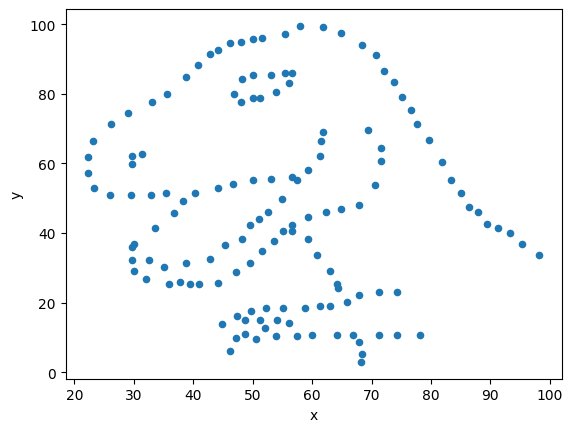

In [5]:
datasets['dino'].plot(kind='scatter', x='x', y='y')

<Axes: xlabel='x', ylabel='y'>

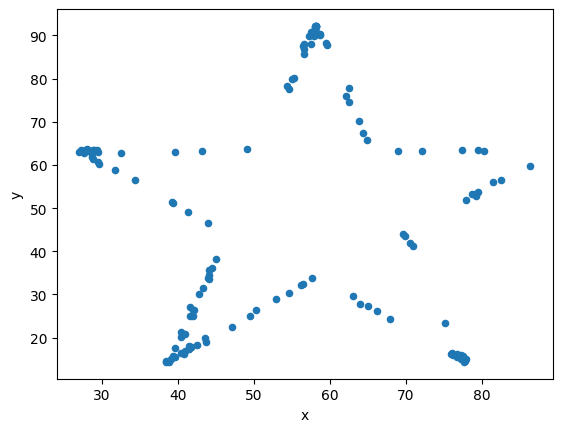

In [6]:
datasets['star'].plot(kind='scatter', x='x', y='y')

<Axes: xlabel='x', ylabel='y'>

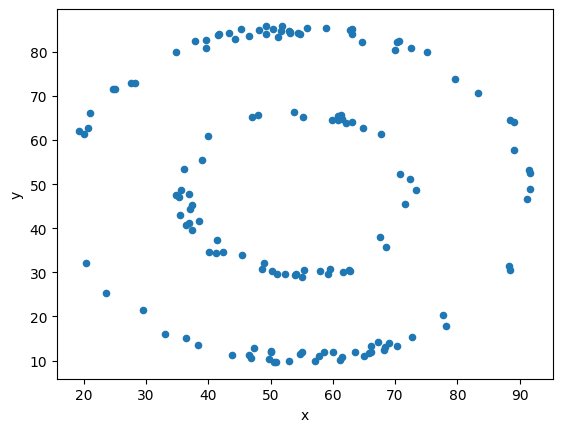

In [7]:
datasets['bullseye'].plot(kind='scatter', x='x', y='y')

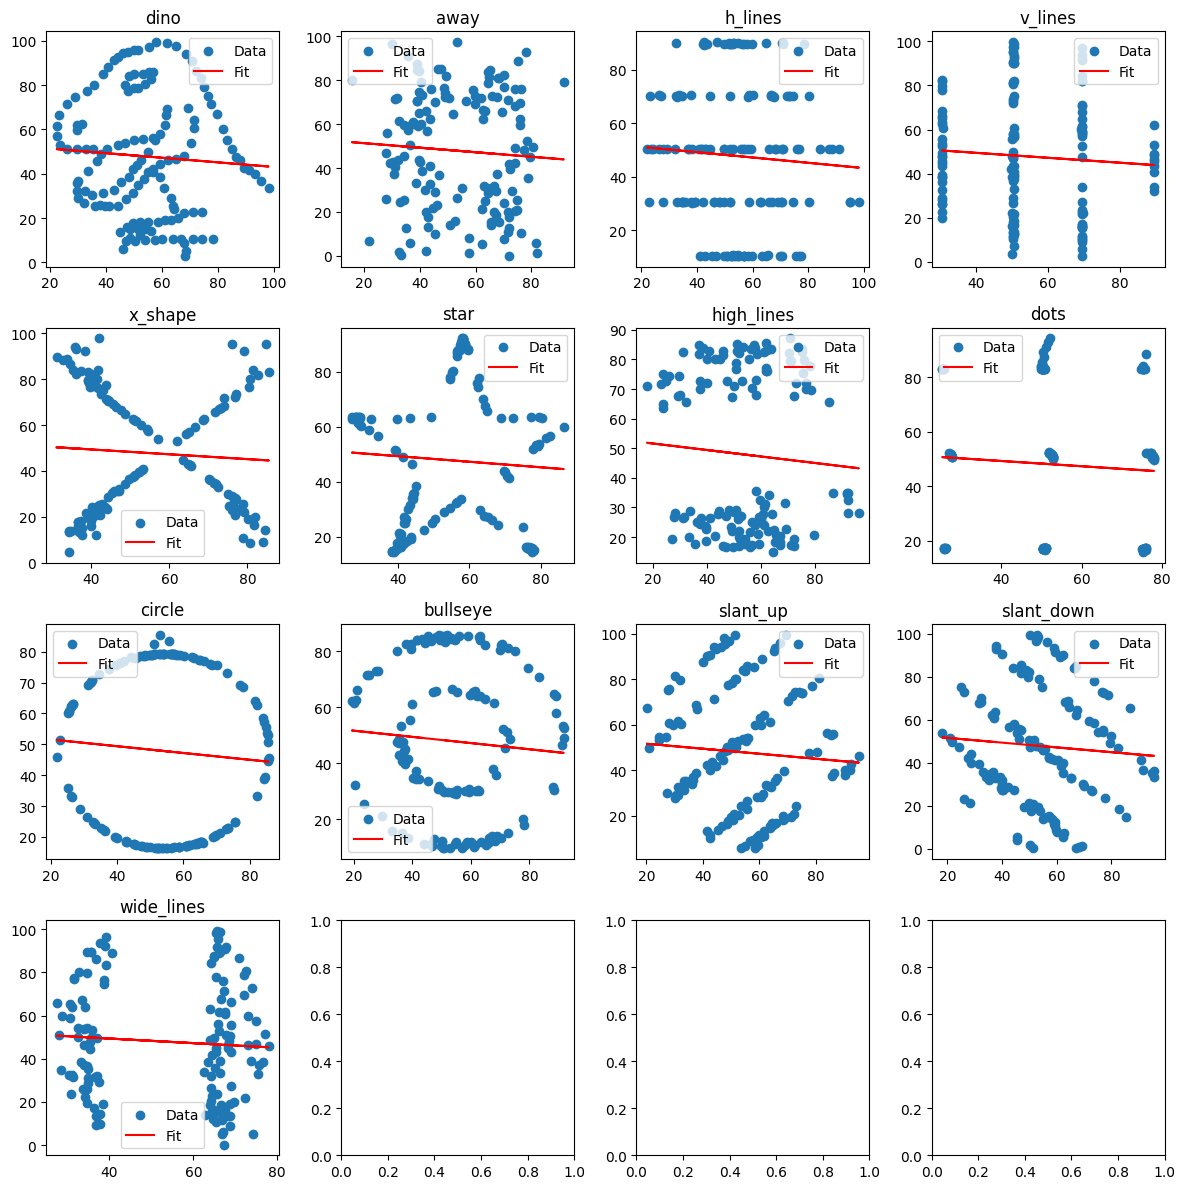

In [16]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 4, figsize=(12, 12))  # Adjust the subplot grid as needed
axs = axs.flatten()  # Flatten the axs array for easier iteration

# Plot data and regression lines
for i, (label, data) in enumerate(datasets.items()):
    axs[i].scatter(data['x'], data['y'], label='Data')
    slope, intercept = linregress(data['x'], data['y'])[:2]
    axs[i].plot(data['x'], intercept + slope * data['x'], 'r-', label='Fit')
    axs[i].set_title(label)
    axs[i].legend()

plt.tight_layout()

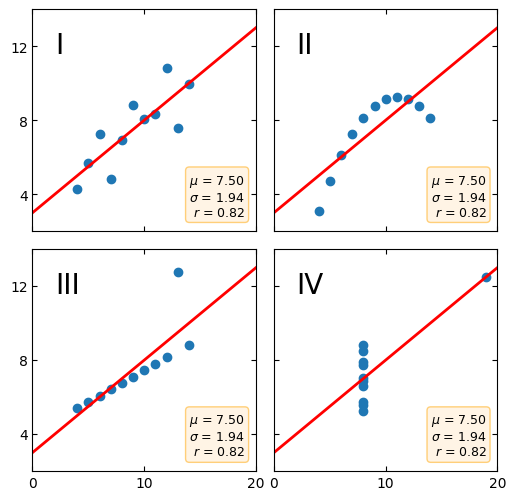

In [22]:
import matplotlib.pyplot as plt
import numpy as np

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

plt.show()

